In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from collections import Counter
pd.set_option('display.max_columns', 50)
from googletrans import Translator
from tqdm import tqdm

In [2]:
orders = pd.read_csv('../Data/Processed/orders.csv', encoding='utf-8')

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,O cliente não comentou,O cliente não comentou,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,O cliente não comentou,O cliente não comentou,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


# 1. Descriptive analysis

In [4]:
orders['comment_present'] = orders.review_comment_message != 'O cliente não comentou'

## 1.1 Answering to survey

(<seaborn.axisgrid.FacetGrid at 0x173f2f9dc18>, count    95978.000000
 mean         4.144356
 std          1.294795
 min          1.000000
 25%          4.000000
 50%          5.000000
 75%          5.000000
 max          5.000000
 Name: review_score, dtype: float64)

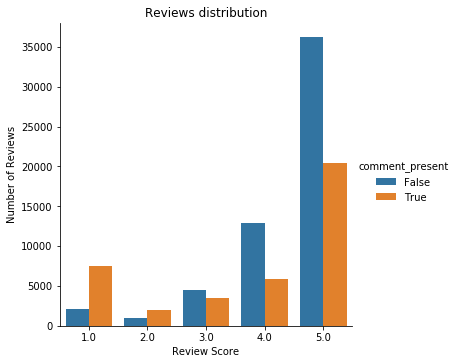

In [5]:
sns.catplot(x='review_score', kind='count', data=orders, hue='comment_present')\
.set(xlabel='Review Score', ylabel='Number of Reviews', title='Reviews distribution'), orders.review_score.describe()

Most reviews are good ones, we can see that the average review score is 4.14, with a median quartile at 5. Furthemore, for almost half of the orders Olist did not receive any customer feedback. Looking at the difference between 1 score reviews and 5 ones, we notice that customers who answered positively in the survey are less likely to leave comments while customers who gave bad feedback are more likely to do it.

## Survey message length

In [ ]:
dims = (12, 5)
fig, ax =plt.subplots(1,2,figsize=dims)

orders[(orders['comment_present'] == True) & (orders['review_score'] == 1)]\
.review_comment_message.map(lambda x : len(str(x))).hist(ax=ax[0])
orders[(orders['comment_present'] == True) & (orders['review_score'] == 5)]\
.review_comment_message.map(lambda x : len(str(x))).hist()